In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Defining functions

In [2]:
def formatCircles(circlesData, circles):
    
    for i in range(5):
        circles.append([])
        sCircle = []
        k = 0
        for line in circlesData[i]:
            sCircle = line.split()
            iCircle = []
            for j in range(1,len(sCircle)):
                iCircle.append(int(sCircle[j]))
            circles[i].append([])
            circles[i][k] = iCircle
            k += 1

def formatFeatnames(data,featnames):
    
    for i in range(5):
        featnames.append([])
        for line in data[i]:
            splittedLine = line.split()
            word = ""
            for j in range(1,len(splittedLine)-1):
                word += splittedLine[j] + " "
            word += splittedLine[len(splittedLine)-1]
            featnames[i].append(word)

def createNodes(data,featnames,g,color):
  
    for line in data:
        splittedLine = line.split()
        j = int(splittedLine[0])
        g.add_node(j)
        g.nodes[j]['color'] = color
        k = 1
        for featname in featnames:
            g.nodes[j][featname] = int(splittedLine[k])
            k += 1

def createEdges(data,g):
    
    for line in data:
        words = line.split()
        e1 = int(words[0])
        e2 = int(words[1])
        g.add_edge(e1,e2)


### Reading datasets and processing data

In [5]:
circlesData = []
edgesData = []
featsData = []
featnamesData = []

for i in range(5):
    edgesData.append(open("dataset/" + str(i) + ".edges","r"))
    featsData.append(open("dataset/" + str(i) + ".feat","r"))
    featnamesData.append(open("dataset/" + str(i) + ".featnames","r"))
    circlesData.append(open("dataset/" + str(i) + ".circles","r"))

circles = []
featnames = []

formatFeatnames(featnamesData,featnames)
formatCircles(circlesData,circles)

### Building the graph

In [6]:
# One color for each dataset:
colors = ['red','blue','chocolate','forestgreen','yellow',]

# G will contain info from all datasets.
G = nx.Graph()

for i in range(5):
    createNodes(featsData[i],featnames[i],G,colors[i])
    createEdges(edgesData[i],G)

### Plotting G

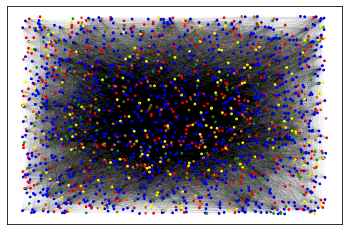

In [17]:
posG = nx.random_layout(G)  # positions for all nodes

labels = {}
for n in G.nodes:
    labels[n] = n

nx.draw_networkx(G,
                 pos=posG,
                 label="Social Circles",
                 labels=labels,
                 with_labels=True,
                 font_size=0.5,
                 width=0.01,
                 node_color= [nx.get_node_attributes(G,'color')[g] for g in G.nodes],
                 node_size=3
                 )

plt.savefig("socialCircles.jpg",format="jpg",dpi=700)
plt.show()

### Plotting cycles of G

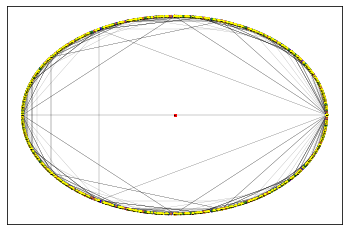

In [25]:
for i in range(5):
    for circle in circles[i]:
        c = nx.cycle_graph(circle)
        for n in circle:
            c.nodes[n]['color'] = G.nodes[n]['color']
        posc = nx.circular_layout(c)
        nx.draw_networkx(c,
                        pos=posc,
                        font_size=0.1,
                        width=0.1,
                        node_color= [nx.get_node_attributes(c,'color')[j] for j in                             c.nodes],   
                        node_size=3
                        )

plt.savefig("onlyCircles.jpg",format="jpg",dpi=700)    
plt.show()

In [ ]:
with open('./graphs.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(G)))

### Closing Files

In [9]:
for i in range(5):
    circlesData[i].close()
    edgesData[i].close()
    featsData[i].close()
    featnamesData[i].close()